# Preprocess Data

* python script to preprocess the data using various techniques
* python script to perform various exploratory data analysis on the data

## Install required libraries

In [68]:
!pip install emoji
!pip install transformers
!pip install spacy
!pip install langdetect

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## Import required libraries

In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import string
import re
import nltk
from tqdm.notebook import tqdm
import emoji
import transformers
from tokenizers import BertWordPieceTokenizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from google.colab import drive
import spacy
from wordcloud import WordCloud
from langdetect import detect
from sklearn.model_selection import train_test_split

## Install required packages

In [70]:
nltk.download('punkt') 
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

## Clean data

### Read dataset

In [71]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [72]:
raw_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/nlp project/Dataset/biden_tweets_raw.csv')

raw_df

,Unnamed: 0,Datetime,Tweet Id,Text,Username
0,0,2020-12-03 23:59:59+00:00,1334648608638054400,@JoeBiden iste bu be sonuna kadar joe biden,EmirhanCil7
1,1,2020-12-03 23:59:58+00:00,1334648604200415232,"Yet you are uncertain why 23,000+ votes (98% f...",MLKing2
2,2,2020-12-03 23:59:57+00:00,1334648599477690380,Right. Sure. You bet. Joe Biden is the Preside...,gfounder1
3,3,2020-12-03 23:59:57+00:00,1334648598475108357,@AlexisJones1969 @theangiestanton I guess you ...,_Quetzy_
4,4,2020-12-03 23:59:56+00:00,1334648597825146882,Great job team. Biden is just reinstalling al...,sphincter987
...,...,...,...,...,...
19997,9996,2020-12-04 22:57:40+00:00,1334995312637775872,Alito Responds To Appeal Asking To Block Biden...,VeraldoF4F
19998,9997,2020-12-04 22:57:40+00:00,1334995312335699969,@realDonaldTrump What a freeeeakeeennn Joke yo...,bfrando
19999,9998,2020-12-04 22:57:39+00:00,1334995311350177795,@realDonaldTrump Thanks Biden! https://t.co/th...,BlueLanternUSA
20000,9999,2020-12-04 22:57:39+00:00,1334995310226116608,Urge President-elect Biden to undo the damage ...,RickeyButtery


In [73]:
# locate column with texts
text_data_raw = raw_df['Text'].values

In [74]:
# text_data_raw

In [75]:
len(text_data_raw)

20002

### Remove non-English tweets

In [76]:
languages = []
text_data = []
en_count = 0
for text in text_data_raw:
  if text != '':
    try:
      language = detect(text)
      if language == 'en':
        en_count = en_count + 1
        text_data.append(text)
    except:
      continue
    languages.append(language)

In [77]:
np.unique(languages, return_counts = True)

(array(['af', 'ca', 'cs', 'cy', 'da', 'de', 'el', 'en', 'es', 'et', 'fa',
        'fi', 'fr', 'hr', 'hu', 'id', 'it', 'ja', 'ko', 'lt', 'nl', 'no',
        'pl', 'pt', 'ro', 'ru', 'sl', 'so', 'sq', 'sv', 'sw', 'tl', 'tr',
        'vi', 'zh-cn'], dtype='<U5'),
 array([   31,    42,     2,     5,    62,   208,     1, 18019,   681,
            9,     1,     9,   143,     1,     2,    39,    43,     4,
            1,     2,   257,    42,     9,   127,   117,     2,     7,
            9,     1,    32,     2,     7,    67,    14,     2]))

In [78]:
# text_data

In [148]:
print(en_count)

18019


In [147]:
# store English tweets as new df
clean_df = pd.DataFrame(text_data, columns = ['Text'])

clean_df

,Text
0,"Yet you are uncertain why 23,000+ votes (98% f..."
1,Right. Sure. You bet. Joe Biden is the Preside...
2,@AlexisJones1969 @theangiestanton I guess you ...
3,Great job team. Biden is just reinstalling al...
4,@bookmaker_eu Will I get paid out on my Biden ...
...,...
18014,Alito Responds To Appeal Asking To Block Biden...
18015,@realDonaldTrump What a freeeeakeeennn Joke yo...
18016,@realDonaldTrump Thanks Biden! https://t.co/th...
18017,Urge President-elect Biden to undo the damage ...


### Remove duplicate tweets

In [149]:
clean_df = clean_df.drop_duplicates(keep='first')

clean_df

,Text
0,rt com guy funding fake story hunter biden
1,biden apparently told jtaps going ask everyone...
2,kingofgameplay heathmayo given chance blown tr...
3,conorjrogers reedgalen could not raise money b...
4,biden fire board member postal governor replace
...,...
17646,kthomasdc costareports nice hope biden think m...
17647,livingdead omg sensitive soul record massive o...
17648,bryceagen itsjefftiedrich realdonaldtrump coac...
17649,tomboliko resistor realdonaldtrump hillary che...


### Shuffle cleaned data

In [150]:
# shuffle dataframe rows
df = clean_df.sample(frac=1, random_state=42).reset_index(drop=True)

df

,Text
0,debramessing davidmweissman care said mean shi...
1,fauci rock good see biden agrees need straight...
2,realdonaldtrump thanks biden win
3,eflplace charliekirk oh dont like good thing d...
4,realdonaldtrump anticipation smarter saner eff...
...,...
17646,friday december th obama biden regime corrupt ...
17647,course trump not concede want continue grift h...
17648,willleftridge seanwal whole biden run year old...
17649,care least much maybe whether biden trump pres...


## Preprocess functions

In [83]:
def emoji_cleaning(text):
    
  # Change emoji to text
  text = emoji.demojize(text).replace(":", " ")
  
  # Delete repeated emoji
  tokenizer = text.split()
  repeated_list = []
  
  for word in tokenizer:
      if word not in repeated_list:
          repeated_list.append(word)
  
  text = ' '.join(text for text in repeated_list)
  text = text.replace("_", " ").replace("-", " ")
  return text

In [84]:
def clean_smileys(text):
    
    text = re.sub(r'(:\)|: \)|\(\:|:-\)|: -\)|: - \)|:D|: D)', ' smile ', text)
    text = re.sub(r'(:\(|: \(|\)\:|:-\(|: -\(|: - \(|:\'\()', ' dislike ', text)
    text = re.sub(r'(<3)', ' heart ', text)
    text = re.sub(r'(:/)', ' dislike ', text)
    text = re.sub(r'(;\)|; \))', ' wink ', text)
    return ' '.join([word for word in text.split()])

In [85]:
def clean_urls(review):
    review = review.split()
    review = ' '.join([word for word in review if not re.match('^http', word)])
    return review

In [86]:
def decontracted(text):
    text = re.sub(r"won\’t", "will not", text)
    text = re.sub(r"don't", "do not", text)
    text = re.sub(r"don't", "do not", text)
    text = re.sub(r"can\’t", "can not", text)
    text = re.sub(r"n\’t", " not", text)
    text = re.sub(r"\’re", " are", text)
    text = re.sub(r"it\'s", "it is", text)
    text = re.sub(r"\’d", " would", text)
    text = re.sub(r"\’ll", " will", text)
    text = re.sub(r"\’t", " not", text)
    text = re.sub(r"\’ve", " have", text)
    text = re.sub(r"\’m", " am", text)

    text = re.sub(r"n\'t", " not", text)
    text = re.sub(r"\’re", " are", text)
    text = re.sub(r"\'re", " are", text)
    text = re.sub(r"\'d", " would", text)
    text = re.sub(r"\’d", " would", text)
    text = re.sub(r"\'ll", " will", text)
    text = re.sub(r"\’ll", " will", text)
    text = re.sub(r"\'t", " not", text)
    text = re.sub(r"\’t", " not", text)
    text = re.sub(r"\'ve", " have", text)
    text = re.sub(r"\’ve", " have", text)
    text = re.sub(r"\'m", " am", text)
    text = re.sub(r"\’m", " am", text)
    text = re.sub(r"\“", "", text)
    text = re.sub(r"\”", "", text)
    text = re.sub(r"\…", "", text)

    return text

In [87]:
def clean_text(text):
    text = str(text)
    text = re.sub(r'(\w)\1{2,}', r'\1', text)
    text = re.sub(r'[^a-zA-Z ]+', ' ', text)
    text = re.sub(r'http\S+', ' ', text)
    text = re.sub(r'https?:\/\/.*[\r\n]*', '', text)
    text = re.sub(r'^RT[\s]+', '', text)
    text = re.sub(r'pic.twitter\S+', ' ', text)
    text = re.sub(r'#', '', text)
    text = text.lower()

    return text

In [88]:
stop_words = stopwords.words('english') 
stop_words.remove('not') 
lemmatizer = WordNetLemmatizer()

In [89]:
def data_preprocessing(review):
    
  # data cleaning
    review = re.sub(re.compile('<.*?>'), '', review) #removing html tags
    review =  re.sub('[^A-Za-z0-9]+', ' ', review) #taking only words
  
  # lowercase
    review = review.lower()
  
  # tokenization
    tokens = nltk.word_tokenize(review) # converts review to tokens
  
  # stop_words removal
    review = [word for word in tokens if word not in stop_words] #removing stop words
  
  # lemmatization
    review = [lemmatizer.lemmatize(word) for word in review]
  
  # join words in preprocessed review
    review = ' '.join(review)
    return review

## Process dataset

### Full dataset

#### Read dataset

In [151]:
# rename text coumn
df = df.rename(columns={'Text': 'raw_text'})

df

,raw_text
0,rt com guy funding fake story hunter biden
1,biden apparently told jtaps going ask everyone...
2,kingofgameplay heathmayo given chance blown tr...
3,conorjrogers reedgalen could not raise money b...
4,biden fire board member postal governor replace
...,...
17646,kthomasdc costareports nice hope biden think m...
17647,livingdead omg sensitive soul record massive o...
17648,bryceagen itsjefftiedrich realdonaldtrump coac...
17649,tomboliko resistor realdonaldtrump hillary che...


#### Preprocess tweets

In [152]:
df['clean_text'] = df['raw_text'].apply(clean_urls).apply(clean_text).apply(emoji_cleaning).apply(clean_smileys).apply(decontracted)
#.apply(correct_spellings)

In [153]:
df['clean_text'] = df['clean_text'].apply(lambda review: data_preprocessing(review))

df

,raw_text,clean_text
0,rt com guy funding fake story hunter biden,rt com guy funding fake story hunter biden
1,biden apparently told jtaps going ask everyone...,biden apparently told jtaps going ask everyone...
2,kingofgameplay heathmayo given chance blown tr...,kingofgameplay heathmayo given chance blown tr...
3,conorjrogers reedgalen could not raise money b...,conorjrogers reedgalen could not raise money b...
4,biden fire board member postal governor replace,biden fire board member postal governor replace
...,...,...
17646,kthomasdc costareports nice hope biden think m...,kthomasdc costareports nice hope biden think m...
17647,livingdead omg sensitive soul record massive o...,livingdead omg sensitive soul record massive o...
17648,bryceagen itsjefftiedrich realdonaldtrump coac...,bryceagen itsjefftiedrich realdonaldtrump coac...
17649,tomboliko resistor realdonaldtrump hillary che...,tomboliko resistor realdonaldtrump hillary che...


#### Export processed data

In [93]:
process_file_name = 'biden_tweets_processed.csv'
  
df.to_csv(process_file_name)

### Labeled dataset

* subjectivity: 0 - neutral, 1 - opinionated
* polarity: 0 - negative, 1 - positive, 2 - neutral

#### Read dataset

In [94]:
label_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/nlp project/Dataset/biden_tweets_labeled.csv')

label_df

,Unnamed: 0,Text,subjectivity,polarity
0,0,@RT_com That’s the guy who is funding those fa...,1,1
1,1,Biden apparently just told JTaps that he's goi...,1,0
2,2,@Kingofgameplay1 @HeathMayo They've been given...,1,0
3,3,@conorjrogers @reedgalen They could not raise ...,1,1
4,4,Can`t Biden just fire the board members on the...,1,0
...,...,...,...,...
1761,878,"@KThomasDC @costareports That’s nice, but I ho...",0,2
1762,879,@livingdead1970 OMG. You are a sensitive soul...,1,1
1763,880,@bryceagen @itsJeffTiedrich @realDonaldTrump @...,1,1
1764,881,@Tomboliko @the_resistor @realDonaldTrump Hill...,1,0


In [95]:
label_df.columns

Index(['Unnamed: 0', 'Text', 'subjectivity', 'polarity'], dtype='object')

In [96]:
# drop irrelevant column(s) 
label_df = label_df.drop('Unnamed: 0', axis=1)

label_df

,Text,subjectivity,polarity
0,@RT_com That’s the guy who is funding those fa...,1,1
1,Biden apparently just told JTaps that he's goi...,1,0
2,@Kingofgameplay1 @HeathMayo They've been given...,1,0
3,@conorjrogers @reedgalen They could not raise ...,1,1
4,Can`t Biden just fire the board members on the...,1,0
...,...,...,...
1761,"@KThomasDC @costareports That’s nice, but I ho...",0,2
1762,@livingdead1970 OMG. You are a sensitive soul...,1,1
1763,@bryceagen @itsJeffTiedrich @realDonaldTrump @...,1,1
1764,@Tomboliko @the_resistor @realDonaldTrump Hill...,1,0


In [97]:
# rename text coumn
label_df = label_df.rename(columns={'Text': 'raw_text'})

label_df

,raw_text,subjectivity,polarity
0,@RT_com That’s the guy who is funding those fa...,1,1
1,Biden apparently just told JTaps that he's goi...,1,0
2,@Kingofgameplay1 @HeathMayo They've been given...,1,0
3,@conorjrogers @reedgalen They could not raise ...,1,1
4,Can`t Biden just fire the board members on the...,1,0
...,...,...,...
1761,"@KThomasDC @costareports That’s nice, but I ho...",0,2
1762,@livingdead1970 OMG. You are a sensitive soul...,1,1
1763,@bryceagen @itsJeffTiedrich @realDonaldTrump @...,1,1
1764,@Tomboliko @the_resistor @realDonaldTrump Hill...,1,0


#### Preprocess tweets

In [98]:
label_df['clean_text'] = label_df['raw_text'].apply(clean_urls).apply(clean_text).apply(emoji_cleaning).apply(clean_smileys).apply(decontracted)
#.apply(correct_spellings)

In [99]:
label_df['clean_text'] = label_df['clean_text'].apply(lambda review: data_preprocessing(review))

label_df

,raw_text,subjectivity,polarity,clean_text
0,@RT_com That’s the guy who is funding those fa...,1,1,rt com guy funding fake story hunter biden
1,Biden apparently just told JTaps that he's goi...,1,0,biden apparently told jtaps going ask everyone...
2,@Kingofgameplay1 @HeathMayo They've been given...,1,0,kingofgameplay heathmayo given chance blown tr...
3,@conorjrogers @reedgalen They could not raise ...,1,1,conorjrogers reedgalen could not raise money b...
4,Can`t Biden just fire the board members on the...,1,0,biden fire board member postal governor replace
...,...,...,...,...
1761,"@KThomasDC @costareports That’s nice, but I ho...",0,2,kthomasdc costareports nice hope biden think m...
1762,@livingdead1970 OMG. You are a sensitive soul...,1,1,livingdead omg sensitive soul record massive o...
1763,@bryceagen @itsJeffTiedrich @realDonaldTrump @...,1,1,bryceagen itsjefftiedrich realdonaldtrump coac...
1764,@Tomboliko @the_resistor @realDonaldTrump Hill...,1,0,tomboliko resistor realdonaldtrump hillary che...


#### Export processed data

In [100]:
label_df.columns

Index(['raw_text', 'subjectivity', 'polarity', 'clean_text'], dtype='object')

In [101]:
new_cols = ["raw_text","clean_text","subjectivity","polarity"]
label_df = label_df[new_cols]

label_df

,raw_text,clean_text,subjectivity,polarity
0,@RT_com That’s the guy who is funding those fa...,rt com guy funding fake story hunter biden,1,1
1,Biden apparently just told JTaps that he's goi...,biden apparently told jtaps going ask everyone...,1,0
2,@Kingofgameplay1 @HeathMayo They've been given...,kingofgameplay heathmayo given chance blown tr...,1,0
3,@conorjrogers @reedgalen They could not raise ...,conorjrogers reedgalen could not raise money b...,1,1
4,Can`t Biden just fire the board members on the...,biden fire board member postal governor replace,1,0
...,...,...,...,...
1761,"@KThomasDC @costareports That’s nice, but I ho...",kthomasdc costareports nice hope biden think m...,0,2
1762,@livingdead1970 OMG. You are a sensitive soul...,livingdead omg sensitive soul record massive o...,1,1
1763,@bryceagen @itsJeffTiedrich @realDonaldTrump @...,bryceagen itsjefftiedrich realdonaldtrump coac...,1,1
1764,@Tomboliko @the_resistor @realDonaldTrump Hill...,tomboliko resistor realdonaldtrump hillary che...,1,0


In [102]:
process_label_file_name = 'biden_tweets_labeled_processed.csv'
  
label_df.to_csv(process_label_file_name)

## Explore dataset

### Full dataset

#### Word counts

In [154]:
raw_word_counts = df['raw_text'].apply(lambda x: len(x.split()))

raw_word_counts.describe()

count    17651.000000
mean        14.205314
std          7.500557
min          1.000000
25%          8.000000
50%         13.000000
75%         20.000000
max         83.000000
Name: raw_text, dtype: float64

In [155]:
clean_word_counts = df['clean_text'].apply(lambda x: len(x.split()))

clean_word_counts.describe()

count    17651.000000
mean        14.138406
std          7.447002
min          1.000000
25%          8.000000
50%         13.000000
75%         20.000000
max         83.000000
Name: clean_text, dtype: float64

#### Tokenization

In [156]:
nlp = spacy.load('en_core_web_sm')
nlp

In [157]:
clean_text_data = df['clean_text'].values

In [158]:
# clean_text_data

In [159]:
len(clean_text_data)

17651

In [160]:
texts = ''
for text in clean_text_data:
  texts += ' ' + text

In [161]:
# texts

In [162]:
len(texts)

1764091

In [163]:
tokens = nltk.tokenize.word_tokenize(texts)

In [164]:
# tokens

In [165]:
len(tokens)

249557

#### Most frequent words

In [166]:
frequency = nltk.FreqDist(tokens)
most_common = frequency.most_common()

In [167]:
# most_common
print(most_common[0:20])

[('biden', 17622), ('trump', 3629), ('joe', 3077), ('president', 3072), ('realdonaldtrump', 2904), ('not', 2400), ('vote', 1581), ('election', 1435), ('say', 1292), ('people', 1288), ('day', 1212), ('elect', 1168), ('like', 1101), ('get', 1087), ('would', 1035), ('american', 1034), ('u', 1021), ('mask', 1000), ('know', 852), ('amp', 811)]


#### Word cloud

(-0.5, 399.5, 199.5, -0.5)

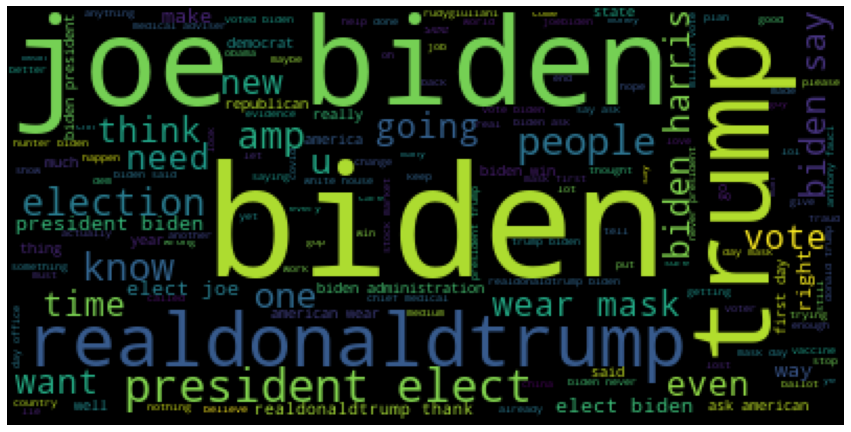

In [117]:
cloud = WordCloud()
cloud = cloud.generate(texts)
plt.figure(figsize=(15,15))
plt.imshow(cloud)
plt.axis('off')

### Labeled dataset

#### Word counts

In [118]:
label_raw_word_counts = label_df['raw_text'].apply(lambda x: len(x.split()))

label_raw_word_counts.describe()

count    1766.000000
mean       24.956399
std        14.428796
min         2.000000
25%        13.000000
50%        21.000000
75%        36.000000
max        87.000000
Name: raw_text, dtype: float64

In [119]:
label_clean_word_counts = label_df['clean_text'].apply(lambda x: len(x.split()))

label_clean_word_counts.describe()

count    1766.000000
mean       14.007928
std         7.727362
min         2.000000
25%         8.000000
50%        12.000000
75%        19.000000
max        83.000000
Name: clean_text, dtype: float64

#### Sentiment counts

* subjectivity: 0 - neutral, 1 - opinionated
* polarity: 0 - negative, 1 - positive, 2 - neutral

In [120]:
label_df['subjectivity'].value_counts()

1    1287
0     479
Name: subjectivity, dtype: int64

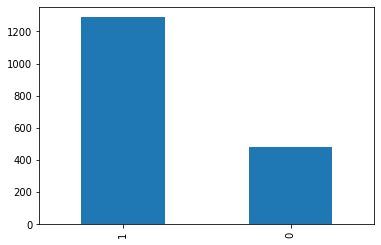

In [121]:
label_df['subjectivity'].value_counts().plot.bar()

In [122]:
label_df['polarity'].value_counts()

0    733
1    554
2    479
Name: polarity, dtype: int64

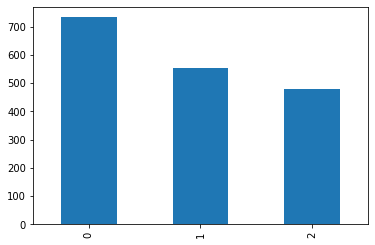

In [123]:
label_df['polarity'].value_counts().plot.bar()

#### Tokenization

In [124]:
label_clean_text_data = label_df['clean_text'].values

In [125]:
# label_clean_text_data

In [126]:
len(label_clean_text_data)

1766

In [127]:
label_texts = ''
for text in label_clean_text_data:
  label_texts += ' ' + text

In [128]:
# label_texts

In [129]:
len(label_texts)

174642

In [130]:
label_tokens = nltk.tokenize.word_tokenize(label_texts)

In [131]:
# label_tokens

In [132]:
len(label_tokens)

24738

#### Most frequent words

In [133]:
label_frequency = nltk.FreqDist(label_tokens)
label_most_common = label_frequency.most_common()

In [134]:
# label_most_common
print(label_most_common[0:20])

[('biden', 1765), ('trump', 336), ('president', 313), ('joe', 310), ('realdonaldtrump', 286), ('not', 255), ('election', 155), ('vote', 154), ('say', 139), ('day', 134), ('would', 120), ('elect', 119), ('like', 118), ('get', 113), ('mask', 112), ('people', 112), ('u', 111), ('american', 110), ('know', 105), ('harris', 91)]


#### Word cloud

(-0.5, 399.5, 199.5, -0.5)

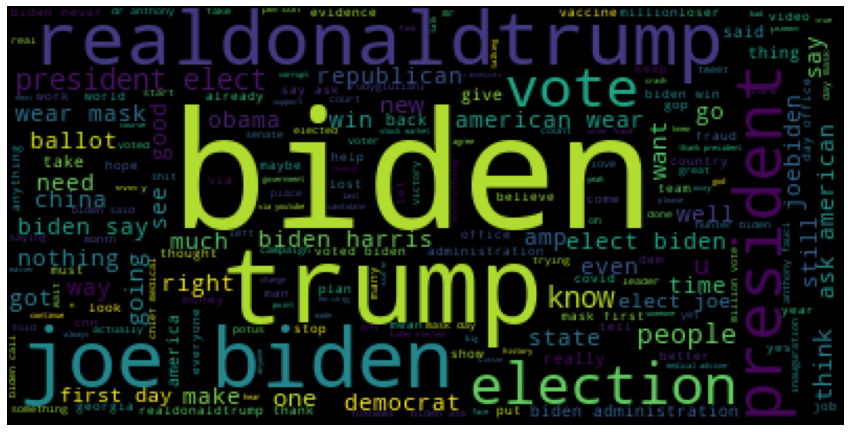

In [135]:
cloud = WordCloud()
cloud = cloud.generate(label_texts)
plt.figure(figsize=(15,15))
plt.imshow(cloud)
plt.axis('off')

## Create train-test data

* split labeled data into train (80%) and test sets (20%)

In [136]:
label_df

,raw_text,clean_text,subjectivity,polarity
0,@RT_com That’s the guy who is funding those fa...,rt com guy funding fake story hunter biden,1,1
1,Biden apparently just told JTaps that he's goi...,biden apparently told jtaps going ask everyone...,1,0
2,@Kingofgameplay1 @HeathMayo They've been given...,kingofgameplay heathmayo given chance blown tr...,1,0
3,@conorjrogers @reedgalen They could not raise ...,conorjrogers reedgalen could not raise money b...,1,1
4,Can`t Biden just fire the board members on the...,biden fire board member postal governor replace,1,0
...,...,...,...,...
1761,"@KThomasDC @costareports That’s nice, but I ho...",kthomasdc costareports nice hope biden think m...,0,2
1762,@livingdead1970 OMG. You are a sensitive soul...,livingdead omg sensitive soul record massive o...,1,1
1763,@bryceagen @itsJeffTiedrich @realDonaldTrump @...,bryceagen itsjefftiedrich realdonaldtrump coac...,1,1
1764,@Tomboliko @the_resistor @realDonaldTrump Hill...,tomboliko resistor realdonaldtrump hillary che...,1,0


In [137]:
train_df, test_df = train_test_split(label_df, test_size=0.2, random_state=42)

In [138]:
train_df.shape, test_df.shape

((1412, 4), (354, 4))

In [139]:
train_df

,raw_text,clean_text,subjectivity,polarity
1320,@Sundae_Gurl Biden's first move should be to p...,sundae gurl biden first move pardon hunter let...,0,2
782,@cobiscool @LilNasX Do you think joe Biden dri...,cobiscool lilnasx think joe biden drink caprisun,0,2
1128,"@ProudGayPatriot Don't worry, in the sense tha...",proudgaypatriot worry sense not getting electi...,1,1
199,@kclasgens @realDonaldTrump Not alone he didn'...,kclasgens realdonaldtrump not alone right even...,1,1
704,How Biden’s Climate Plans Will Shake Up Global...,biden climate plan shake global energy market,0,2
...,...,...,...,...
1130,"@CNBC @CNBCPro If Biden comes to power, the go...",cnbc cnbcpro biden come power gold price return,1,1
1294,"@KDFildesMBA We have a real President, Biden a...",kdfildesmba real president biden vice harris e...,1,1
860,"What I care about at least as much, maybe more...",care least much maybe whether biden trump pres...,0,2
1459,Joe Biden still doesn’t realize what the voter...,joe biden still realize voter democrat lost ac...,1,0


In [140]:
test_df

,raw_text,clean_text,subjectivity,polarity
1560,Sidney Powell amends court filing that said Ge...,sidney powell amends court filing said georgia...,1,0
212,@LisaMirandoCNN @wolfblitzer What's your thoug...,lisamirandocnn wolfblitzer thought cnn jake ta...,0,2
1586,Breaking #FoxNews Alert : Joe Biden just revea...,breaking foxnews alert joe biden revealed goin...,0,2
836,"@RWPUSA Richard, have you heard there could be...",rwpusa richard heard could several republican ...,1,0
1245,@LeafCavalier @AFJustinKG1 Is that a real-life...,leafcavalier afjustinkg real life question not...,1,1
...,...,...,...,...
611,@realDonaldTrump Thank you Biden!!!,realdonaldtrump thank biden,1,1
694,Kellyanne Conway acknowledges Biden as apparen...,kellyanne conway acknowledges biden apparent w...,0,2
1704,@JeffTutorials @realDonaldTrump Ah Jeff. I ag...,jefftutorials realdonaldtrump ah jeff agree bi...,1,0
598,CNN Exclusive: Biden says he will ask American...,cnn exclusive biden say ask american wear mask...,0,2


In [141]:
# labeled train data
train_label_file_name = 'biden_tweets_labeled_train.csv'
  
train_df.to_csv(train_label_file_name)

In [142]:
# labeled test data
test_label_file_name = 'biden_tweets_labeled_test.csv'
  
test_df.to_csv(test_label_file_name)